In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import scipy
pi = np.pi

In [2]:
sampling_rate = 2
t = np.arange(0, 400, 1/sampling_rate)
n = len(t)
cUnBK = np.array([])
cUnJW = np.array([])
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

#BK Hamiltonian
for i in range(n):
    #qr = QuantumRegister(4)
    #qc = QuantumCircuit(qr)
    #Trotter part I
    
    #IIIZ
    qc.rz(0.17218393261915543*t[i], qr[3])
    
    #IIZZ
    qc.cx(qr[2], qr[3])
    qc.rz(- 0.2257534922240237*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    
    #IZII
    qc.rz(0.17218393261915543*t[i], qr[1])
    
    #ZZZI
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])
    qc.rz(-0.22575349222402363*t[i], qr[2])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[0], qr[1])
    
    #IIZI
    qc.rz(0.12091263261776633*t[i], qr[2])
    
    #IZIZ
    qc.cx(qr[1], qr[3])
    qc.rz(0.16892753870087907*t[i], qr[3])
    qc.cx(qr[1], qr[3])
    
    #ZZZZ
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(0.1661454325638241*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[0], qr[1])
    
    #IZZZ
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(0.1661454325638241*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    
    #ZZIZ
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[3])
    qc.rz(0.1746434306830045*t[i], qr[3])
    qc.cx(qr[1], qr[3])
    qc.cx(qr[0], qr[1])
    
    #ZIZI
    qc.cx(qr[0], qr[2])
    qc.rz(0.12091263261776633*t[i], qr[2])
    qc.cx(qr[0], qr[2])

    #Trotter part II
    #ZXIX
    qc.h(qr[1])
    qc.h(qr[3])
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[3])
    qc.rz(0.045232799946057826*t[i], qr[3])
    qc.cx(qr[1], qr[3])
    qc.cx(qr[0], qr[1])
    
    #IXZX
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(-0.045232799946057826*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    
    #ZXZX
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(-0.045232799946057826*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[0], qr[1])
    
    #IXIX
    qc.cx(qr[1], qr[3])
    qc.rz(-0.045232799946057826*t[i], qr[3])
    qc.cx(qr[1], qr[3])
    qc.h(qr[1])
    qc.h(qr[3])

    #create controlled version of time-evolution operator U
    cUnBK = np.append(cUnBK, qc.to_gate().control(1))
    qc.clear()

for i in range(n):
    qc.rz(0.1721839326191555*t[i], qr[3])
    
    qc.rz(- 0.2257534922240236*t[i], qr[2])
    
    qc.rz(0.1721839326191555*t[i], qr[1])
    
    qc.rz(- 0.2257534922240236*t[i], qr[0])
    
    qc.cx(qr[2], qr[3])
    qc.rz(0.12091263261776633*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    
    qc.cx(qr[1], qr[3])
    qc.rz(0.16892753870087907*t[i], qr[3])
    qc.cx(qr[1], qr[3])
    
    #YYYY
    qc.rx(-pi/2, qr[0])
    qc.rx(-pi/2, qr[1])
    qc.rx(-pi/2, qr[2])
    qc.rx(-pi/2, qr[3])
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(0.045232799946057826*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[0], qr[1])
    qc.rx(pi/2, qr[0])
    qc.rx(pi/2, qr[1])
    
    #XXYY
    qc.h(qr[0])
    qc.h(qr[1])
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(0.045232799946057826*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[0], qr[1])
    qc.rx(pi/2, qr[2])
    qc.rx(pi/2, qr[3])
    
    #XXXX
    qc.h(qr[2])
    qc.h(qr[3])
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(0.045232799946057826*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[0], qr[1])
    qc.h(qr[0])
    qc.h(qr[1])
    
    #YYXX
    qc.rx(-pi/2, qr[0])
    qc.rx(-pi/2, qr[1])
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(0.045232799946057826*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[0], qr[1])
    qc.rx(pi/2, qr[0])
    qc.rx(pi/2, qr[1])
    qc.h(qr[2])
    qc.h(qr[3])
    
    #ZIIZ
    qc.cx(qr[0], qr[3])
    qc.rz(0.1661454325638241*t[i], qr[3])
    qc.cx(qr[0], qr[3])
    
    #IZZI
    qc.cx(qr[1], qr[2])
    qc.rz(0.1661454325638241*t[i], qr[2])
    qc.cx(qr[1], qr[2])
    
    #ZIZI
    qc.cx(qr[0], qr[2])
    qc.rz(0.1746434306830045*t[i], qr[2])
    qc.cx(qr[0], qr[2])
    
    #ZZII
    qc.cx(qr[0], qr[1])
    qc.rz(0.12091263261776633*t[i], qr[1])
    qc.cx(qr[0], qr[1])
    
    cUnJW = np.append(cUnJW, qc.to_gate().control(1))
    qc.clear()

In [35]:
# initialize new circuit and  simulator
shots = 10000
time_evolution_BK = np.zeros(n)
time_evolution_JW = np.zeros(n)
qreg = QuantumRegister(5)
creg = ClassicalRegister(1)
circ = QuantumCircuit(qreg, creg)
simulator = Aer.get_backend('aer_simulator')

# simulate BK Hamiltonian
for i in range(n):
    circ.h(qreg[4])
    circ.x(qreg[0])
    circ.x(qreg[1])
    circ.x(qreg[2])
    circ.x(qreg[3])
    circ.append(cUnBK[i], [4, 0, 1, 2, 3])
    #circ.append(cU, [4, 0, 1, 2, 3])
    #circ.append(cU, [4, 0, 1, 2, 3])
    #circ.append(cU, [4, 0, 1, 2, 3])
    circ.h(qreg[4])
    circ.measure(qreg[4], creg[0])

    circ = transpile(circ, simulator)
    result = simulator.run(circ, shots=shots).result()
    counts = result.get_counts(0)
    if '1' in counts:
        time_evolution_BK[i] = (counts['0'] - counts['1']) / shots
    else:
        time_evolution_BK[i] = 1
    circ.clear()
   

In [3]:
 
# simulate JW Hamiltonian
for i in range(n):
    circ.h(qreg[4])
    circ.x(qreg[0])
    circ.x(qreg[1])
    circ.x(qreg[2])
    circ.x(qreg[3])
    circ.append(cUnJW[i], [4, 0, 1, 2, 3])
    #circ.append(cU, [4, 0, 1, 2, 3])
    #circ.append(cU, [4, 0, 1, 2, 3])
    #circ.append(cU, [4, 0, 1, 2, 3])
    circ.h(qreg[4])
    circ.measure(qreg[4], creg[0])

    circ = transpile(circ, simulator)
    result = simulator.run(circ, shots=shots).result()
    counts = result.get_counts(0)
    if '1' in counts:
        time_evolution_JW[i] = (counts['0'] - counts['1']) / shots
    else:
        time_evolution_JW[i] = 1
    circ.clear()
#plot_histogram(counts, title='ancilla qubit')

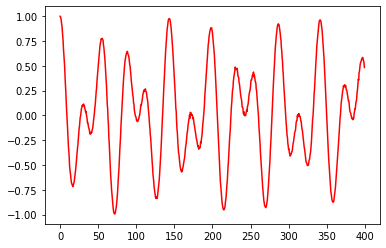

In [37]:
# Plot of the time evolution
plt.plot(t, time_evolution_BK, 'r-')
#plt.plot(t, time_evolution_JW, 'k-')


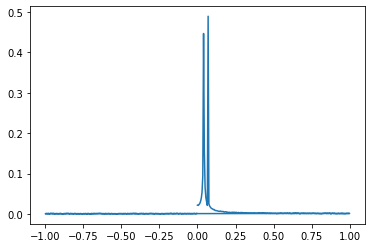

In [49]:
# Fourier analysis of the resulting signal, to obtain frequencies and thus eigenenergies
fourier_BK = 2* np.abs(np.fft.rfft(time_evolution_BK)/ n)
N = len(fourier_BK)
freqs_BK = np.fft.fftfreq(N, 1/2)
plt.plot(freqs_BK, fourier_BK)

In [50]:
peak_index_BK = scipy.signal.find_peaks(fourier_BK, height=0.01)[0]

omega_1 = freqs_BK[peak_index_BK[0]]
omega_2 = freqs_BK[peak_index_BK[2]]
# Energien ohne VZ
#E_1 = omega_1 * 27.211386
#E_2 = omega_2 * 27.211386
omega_2

0.10972568578553615

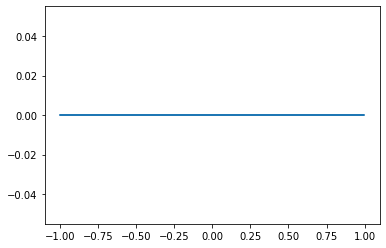

In [52]:
fourier_JW = 2 * np.abs(np.fft.fft(time_evolution_JW)/ n)
N = len(fourier_JW)
freqs_JW = np.fft.fftfreq(N, 1/2)
plt.plot(freqs_JW, fourier_JW)

In [14]:
peak_index_JW = scipy.signal.find_peaks(fourier_JW, height=50)[0]
omega_1_JW = freqs_JW[peak_index_JW[0]]
omega_2_JW = freqs_JW[peak_index_JW[1]]
peak_index_JW

array([  2,  14, 786, 798])

In [62]:
omega_2_BK

0.07